第一課 分類問題

以鳶尾花 (iris) 為例，以萼片(sepal)與花瓣(petal)的長度(length)與寬度(width)來分類鳶尾花的品種，品種分別有山鳶尾(iris setosa)、變色鳶尾(iris versicolor)及維吉尼亞鴛尾(iris virginica)。示意圖如下

![Image of iris sepal petal](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

(參考 https://www.integratedots.com/determine-number-of-iris-species-with-k-means/)

In [1]:
from sklearn import datasets
# 載入資料集
iris = datasets.load_iris()
# 列出資料欄位，分別為(長寬資料、每一筆資料對應的類別、資料框架(此資料集不使用)、類別標籤、資料集完整描述、特徵名稱、資料集檔名)
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [2]:
# 列出資料集完整描述
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

分類問題

使用 iris 資料集，以花瓣長度與花瓣寬度來分類

操作方式一、直接使用矩陣操作

In [3]:
# 載入函式庫
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 1.1 挑選資料
# 共有 150 筆資料(每個品種 50 筆資料)，每筆資料有四個屬性，分別為萼片長度、萼片寬度、花瓣長度與花瓣寬度
# 資料是順序排列，挑選後一百筆，即為iris versicolor與iris virginica。
X = iris["data"][50:149, (2, 3)]  # 花瓣長度 (petal length),花瓣寬度 (petal width)
y = (iris["target"][50:149] == 2).astype(np.int)

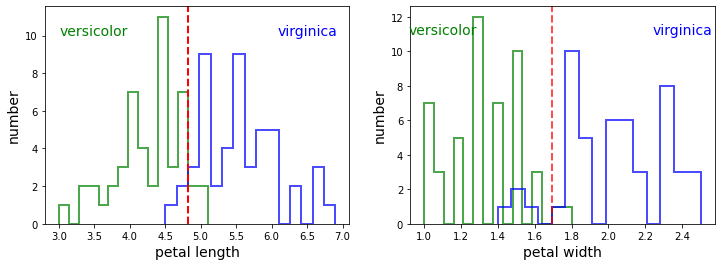

In [5]:
# 1.2 參考一種特徵

# 以花瓣長度作為特徵
# 將兩類資料分為 X_versicolor 與 X_virginica
X_versicolor_length = X[0:49, 0]
X_virginica_length = X[50:99, 0]

# 以花瓣寬度作為特徵
# 將兩類資料分為 X_versicolor 與 X_virginica
X_versicolor_width = X[0:49, 1]
X_virginica_width = X[50:99, 1]

# 繪圖
kwargs_versicolor = dict(histtype='step', bins=15, color="g", linewidth=2, alpha=0.7)
kwargs_virginica = dict(histtype='step', bins=15, color="b", linewidth=2, alpha=0.7)
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
# 繪製長度特徵
plt.sca(axes[0])
plt.hist(X_versicolor_length, **kwargs_versicolor)
plt.hist(X_virginica_length, **kwargs_virginica)
# 分類線
plt.axvline(4.82, 0, 10, linestyle= '--', color="r", linewidth=2)
# 圖的說明
plt.text(3.5, 10, iris["target_names"][1], fontsize=14, color="g", ha="center")
plt.text(6.5, 10, iris["target_names"][2], fontsize=14, color="b", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("number", fontsize=14)
# 繪製寬度特徵
plt.sca(axes[1])
plt.hist(X_versicolor_width, **kwargs_versicolor)
plt.hist(X_virginica_width, **kwargs_virginica)
# 分類線
plt.axvline(1.695, 0, 10, linestyle= '--', color="r", linewidth=2, alpha=0.7)
# 圖的說明
plt.text(1.1, 11, iris["target_names"][1], fontsize=14, color="g", ha="center")
plt.text(2.4, 11, iris["target_names"][2], fontsize=14, color="b", ha="center")
plt.xlabel("petal width", fontsize=14)
plt.ylabel("number", fontsize=14)
plt.show()

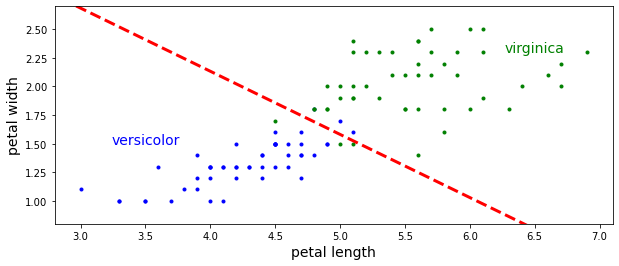

In [6]:
# 1.3 參考兩種特徵

# 使用Logistic 回歸分類
def CalLogisticRegression(X, y, left_right):
    log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
    log_reg.fit(X, y)
    boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
    return boundary


#繪圖
plt.figure(figsize=(10, 4))
x_min = np.min(X[:, 0]) - 0.2
x_max = np.max(X[:, 0]) + 0.2
y_min = np.min(X[:, 1]) - 0.2
y_max = np.max(X[:, 1]) + 0.2
# 屬於 versicolor
plt.plot(X[y==0, 0], X[y==0, 1], "b.")
# 屬於 virginica
plt.plot(X[y==1, 0], X[y==1, 1], "g.")
# 分類線
left_right = np.array([x_min, x_max])
plt.plot(left_right, CalLogisticRegression(X, y, left_right), "r--", linewidth=3)
#顯示範圍
plt.axis([x_min, x_max, y_min, y_max])
# 圖的說明
plt.text(3.5, 1.5, iris["target_names"][1], fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, iris["target_names"][2], fontsize=14, color="g", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.show()


操作方式二、使用 pandas 函式庫來輔助操作

In [7]:
# 載入函式庫
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# 2.1 轉換為 data frame，並以萼片長度、萼片寬度、花瓣長度、花瓣寬度、類別編號與品種名稱的方式呈現。
iris_df = pd.DataFrame(iris.data, columns=['萼片長度', '萼片寬度', '花瓣長度', '花瓣寬度'])
# 將每一筆資料對應的類別加入 data frame
iris_df.loc[:, "類別編號"] = iris.target

# 設計一個品種名稱對應分類編號的 Dataframe
target_labels = {
        '類別編號': np.unique(iris.target),    
        '品種名稱': ['Setosa', 'Versicolor', 'Virginica'] 
        }  
df_z = pd.DataFrame(target_labels, columns = ['類別編號', '品種名稱'])

# 根據類別編號來merge
iris_df=pd.merge(iris_df, df_z, on='類別編號')

# 觀察前五個觀測值
iris_df[iris_df['品種名稱'] == 'Virginica'].head()

# 挑選每個類別的第一筆資料
#sequences = np.unique(iris.target)
#for i in sequences:
#    print(iris_df[iris_df['品種名稱'] == target_labels['品種名稱'][i]].head(1))

,萼片長度,萼片寬度,花瓣長度,花瓣寬度,類別編號,品種名稱
100,6.3,3.3,6.0,2.5,2,Virginica
101,5.8,2.7,5.1,1.9,2,Virginica
102,7.1,3.0,5.9,2.1,2,Virginica
103,6.3,2.9,5.6,1.8,2,Virginica
104,6.5,3.0,5.8,2.2,2,Virginica


In [9]:
print(np.unique(iris_df['品種名稱']))

['Setosa' 'Versicolor' 'Virginica']


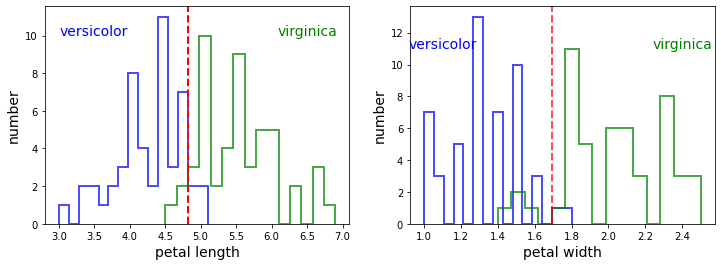

In [10]:
# 2.2 參考一種特徵

# 以花瓣長度作為特徵
# 將兩類資料分為 X_versicolor 與 X_virginica

X_versicolor_length = iris_df[iris_df["品種名稱"].isin(["Versicolor"])]['花瓣長度']
X_virginica_length = iris_df[iris_df["品種名稱"].isin(["Virginica"])]['花瓣長度']

# 以花瓣寬度作為特徵
# 將兩類資料分為 X_versicolor 與 X_virginica
X_versicolor_width = iris_df[iris_df["品種名稱"].isin(["Versicolor"])]['花瓣寬度']
X_virginica_width = iris_df[iris_df["品種名稱"].isin(["Virginica"])]['花瓣寬度']

# 繪圖
kwargs_versicolor = dict(histtype='step', bins=15, color="b", linewidth=2, alpha=0.7)
kwargs_virginica = dict(histtype='step', bins=15, color="g", linewidth=2, alpha=0.7)
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
#繪製長度特徵
plt.sca(axes[0])
plt.hist(X_versicolor_length, **kwargs_versicolor)
plt.hist(X_virginica_length, **kwargs_virginica)
# 分類線
plt.axvline(4.82, 0, 10, linestyle= '--', color="r", linewidth=2)
# 圖的說明
plt.text(3.5, 10, iris["target_names"][1], fontsize=14, color="b", ha="center")
plt.text(6.5, 10, iris["target_names"][2], fontsize=14, color="g", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("number", fontsize=14)
#繪製寬度特徵
plt.sca(axes[1])
plt.hist(X_versicolor_width, **kwargs_versicolor)
plt.hist(X_virginica_width, **kwargs_virginica)
# 分類線
plt.axvline(1.695, 0, 10, linestyle= '--', color="r", linewidth=2, alpha=0.7)
# 圖的說明
plt.text(1.1, 11, iris["target_names"][1], fontsize=14, color="b", ha="center")
plt.text(2.4, 11, iris["target_names"][2], fontsize=14, color="g", ha="center")
plt.xlabel("petal width", fontsize=14)
plt.ylabel("number", fontsize=14)
plt.show()

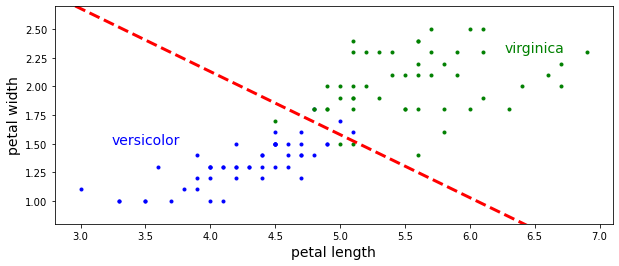

In [11]:
# 2.3 參考兩種特徵

# 篩選資料
# 挑選類別
iris_df_select_target = iris_df[iris_df["品種名稱"].isin(["Versicolor","Virginica"])]
X = np.array([iris_df_select_target['花瓣長度'].tolist(), iris_df_select_target["花瓣寬度"].tolist()]).transpose()
y = (iris_df_select_target['類別編號'] != 2).astype(np.int)

# 使用Logistic 回歸分類
def CalLogisticRegression(X, y, left_right):
    log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
    log_reg.fit(X, y)
    boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
    return boundary

#繪圖
plt.figure(figsize=(10, 4))
x_min = np.min(iris_df_select_target['花瓣長度']) - 0.2
x_max = np.max(iris_df_select_target['花瓣長度']) + 0.2
y_min = np.min(iris_df_select_target["花瓣寬度"]) - 0.2
y_max = np.max(iris_df_select_target["花瓣寬度"]) + 0.2
# 屬於 versicolor
iris_df_select_versicolor = iris_df[iris_df["品種名稱"].isin(["Versicolor"])]
plt.plot(iris_df_select_versicolor['花瓣長度'], iris_df_select_versicolor['花瓣寬度'], "b.")
# 屬於 virginica
iris_df_select_virginica = iris_df[iris_df["品種名稱"].isin(["Virginica"])]
plt.plot(iris_df_select_virginica['花瓣長度'], iris_df_select_virginica['花瓣寬度'], "g.")
# 分類線
left_right = np.array([x_min, x_max])
plt.plot(left_right, CalLogisticRegression(X, y, left_right), "r--", linewidth=3)
#顯示範圍
plt.axis([x_min, x_max, y_min, y_max])
# 圖的說明
plt.text(3.5, 1.5, iris["target_names"][1], fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, iris["target_names"][2], fontsize=14, color="g", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.show()